In [12]:
!git clone https://github.com/aymanezz/Climate_Impact_Agriculture_Yield.git


fatal: destination path 'Climate_Impact_Agriculture_Yield' already exists and is not an empty directory.


In [13]:
'''
import os
os.chdir('Climate_Impact_Agriculture_Yield')
'''

"\nimport os\nos.chdir('Climate_Impact_Agriculture_Yield')\n"

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Define function for loading data
def load_data(file_path):
    return pd.read_csv(file_path)

In [16]:
def inspect_data(df):
    print(f"Shape of the dataframe: {df.shape}")
    print(f"Basic statistics:\n{df.describe()}")
    print(f"Missing values:\n{df.isna().sum()}")

**loading data in colab**

In [17]:

# Load the data
# Adjust file paths according to your environment
production = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_productions.csv')
temp_change = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_temperature_change.csv')
land_cover = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_land_cover.csv')
sea_level = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_sea_level.csv')
atmospheric = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_Atmospheric.csv')
precip = load_data('/content/Climate_Impact_Agriculture_Yield/data/modified/clean_precip.csv')

In [18]:
'''
# Load the data
production = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_productions.csv')
temp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_temperature_change.csv')
land_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_land_cover.csv')
#precip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')
sea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_sea_level.csv')
atmospheric = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_Atmospheric.csv')
'''

"\n# Load the data\nproduction = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_productions.csv')\ntemp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_temperature_change.csv')\nland_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_land_cover.csv')\n#precip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')\nsea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_sea_level.csv')\natmospheric = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\clean_Atmospheric.csv')\n"

In [19]:
production.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "CÃ´te d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
     

In [20]:
production.head()

,Area,Item,Year,Production
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08
1,Afghanistan,Apples,1961,7.127000e+03
2,Afghanistan,Apricots,1961,2.621000e+04
3,Afghanistan,Barley,1961,7.364400e+04
4,Afghanistan,Cantaloupes and other melons,1961,5.890000e+03


In [21]:
inspect_data(production['Production'])

Shape of the dataframe: (340442,)
Basic statistics:
count    3.404420e+05
mean     5.054536e+07
std      1.592046e+08
min      0.000000e+00
25%      1.292500e+04
50%      1.723790e+05
75%      3.690698e+06
max      2.699840e+09
Name: Production, dtype: float64
Missing values:
0


In [22]:
precip.head()

,year,precip,Area
0,1979,3.035422,New Zealand
1,1979,1.899217,New Zealand
2,1979,2.447072,New Zealand
3,1979,2.371907,New Zealand
4,1979,7.538438,New Zealand


In [19]:
precip.rename(columns = {'year':'Year'},inplace = True)

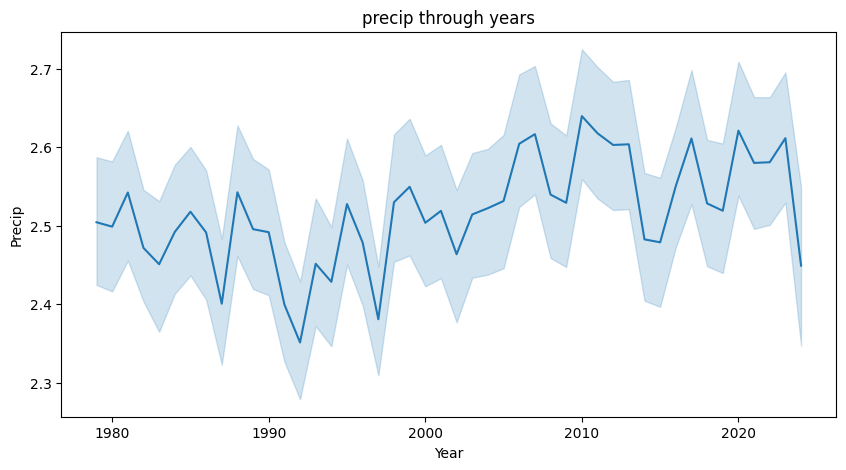

In [20]:
plt.figure(figsize = (10,5))
sns.lineplot(data = precip,x= 'Year',y = 'precip')
plt.title('precip through years')
plt.xlabel('Year')
plt.ylabel('Precip')
plt.show()

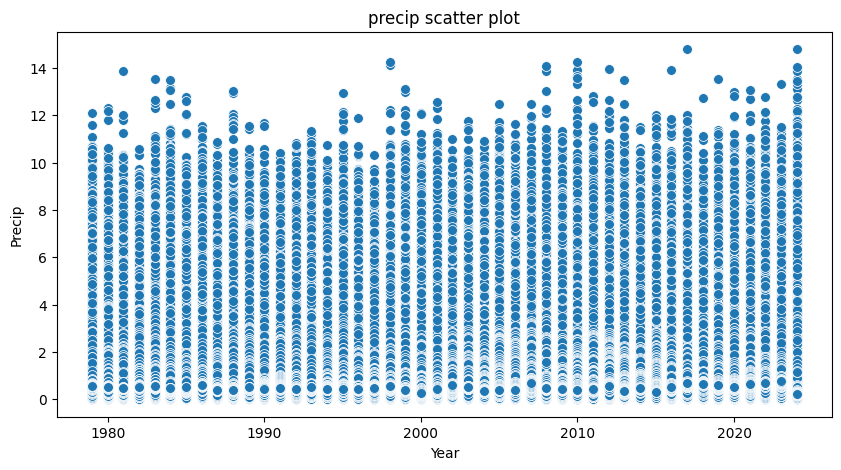

In [21]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = precip,x = 'Year',y = 'precip',s= 50)
plt.title('precip scatter plot')
plt.xlabel('Year')
plt.ylabel('Precip')
plt.show()

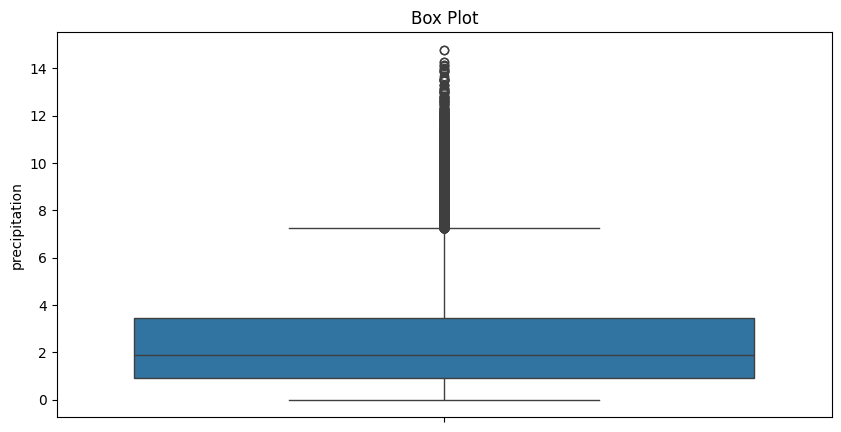

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(data = precip,y = 'precip')
plt.title('Box Plot')
plt.ylabel('precipitation')
plt.show()

In [23]:
precip_produc = pd.merge(production ,precip,on = ['Area','Year'])

In [24]:
precip_produc.head()

,Area,Item,Year,Production,precip
0,Afghanistan,"Almonds, in shell",1979,53089.0,0.187367
1,Afghanistan,"Almonds, in shell",1979,53089.0,0.358901
2,Afghanistan,"Almonds, in shell",1979,53089.0,0.754969
3,Afghanistan,"Almonds, in shell",1979,53089.0,1.031697
4,Afghanistan,"Almonds, in shell",1979,53089.0,1.028717


In [29]:
production.head()

,Area,Item,Year,Production
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08
1,Afghanistan,Apples,1961,7.127000e+03
2,Afghanistan,Apricots,1961,2.621000e+04
3,Afghanistan,Barley,1961,7.364400e+04
4,Afghanistan,Cantaloupes and other melons,1961,5.890000e+03


In [30]:
precip_produc.head()

,Area,Item,Year,Production,precip
0,Afghanistan,"Almonds, in shell",1979,53089.0,0.187367
1,Afghanistan,"Almonds, in shell",1979,53089.0,0.358901
2,Afghanistan,"Almonds, in shell",1979,53089.0,0.754969
3,Afghanistan,"Almonds, in shell",1979,53089.0,1.031697
4,Afghanistan,"Almonds, in shell",1979,53089.0,1.028717


In [31]:
precip.head()

,Year,precip,Area
0,1979,3.035422,New Zealand
1,1979,1.899217,New Zealand
2,1979,2.447072,New Zealand
3,1979,2.371907,New Zealand
4,1979,7.538438,New Zealand


KeyboardInterrupt: 

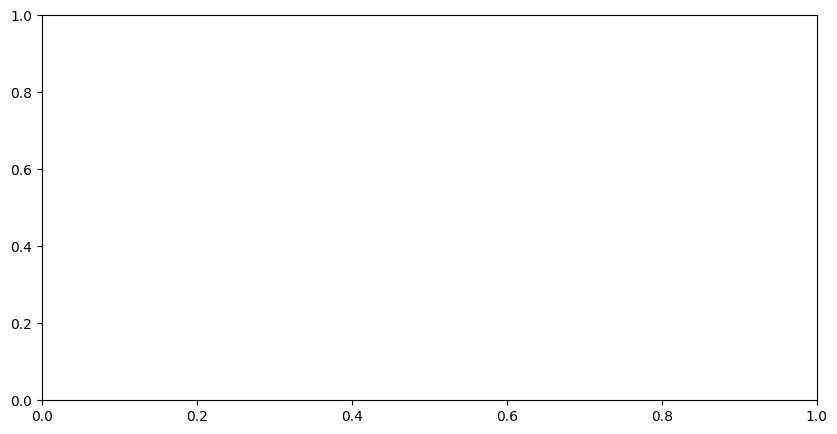

In [25]:
plt.figure(figsize = (10,5))
sns.lineplot(data = precip_produc,x = 'precip',y = 'Production')
plt.title('effict of precip on production')
plt.xlabel('precip')
plt.ylabel('Production')
plt.show()

In [ ]:

temp_change.head()


,Area,Year,Temperature Change
0,Afghanistan,1961,-0.126
1,Albania,1961,0.635
2,Algeria,1961,0.155
3,American Samoa,1961,0.121
4,Andorra,1961,0.756


In [ ]:
inspect_data(temp_change['Temperature Change'])

Shape of the dataframe: (17892,)
Basic statistics:
count    17892.000000
mean         0.571021
std          0.660031
min         -3.251000
25%          0.092690
50%          0.491000
75%          1.019000
max          5.327000
Name: Temperature Change, dtype: float64
Missing values:
0


In [ ]:
product_temp = pd.merge(production,temp_change,on=['Area','Year'])

In [ ]:
product_temp

,Area,Item,Year,Production,Temperature Change
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08,-0.126
1,Afghanistan,Apples,1961,7.127000e+03,-0.126
2,Afghanistan,Apricots,1961,2.621000e+04,-0.126
3,Afghanistan,Barley,1961,7.364400e+04,-0.126
4,Afghanistan,Cantaloupes and other melons,1961,5.890000e+03,-0.126
...,...,...,...,...,...
335787,Net Food Importing Developing Countries,Oilcrops Primary,2022,3.001882e+07,1.058
335788,Net Food Importing Developing Countries,"Roots and Tubers, Total",2022,4.482258e+07,1.058
335789,Net Food Importing Developing Countries,Sugar Crops Primary,2022,1.084941e+07,1.058
335790,Net Food Importing Developing Countries,Vegetables and Fruit Primary,2022,1.026037e+08,1.058


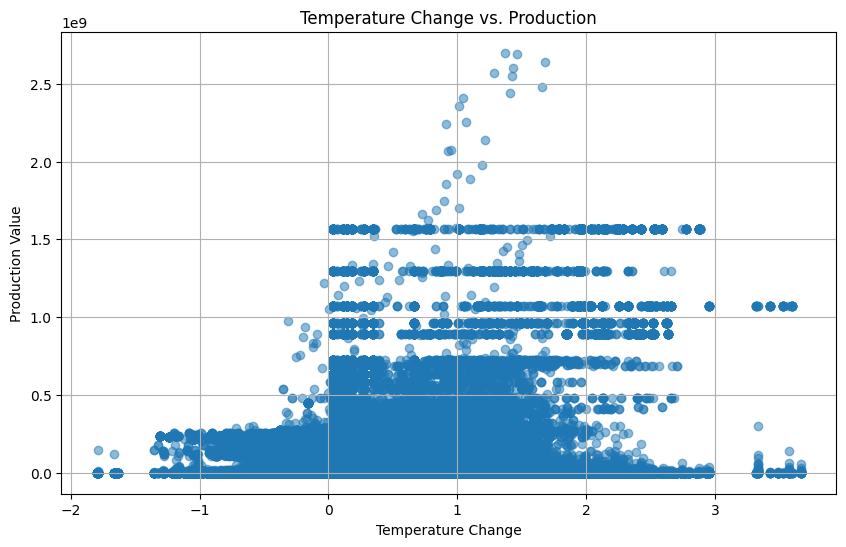

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(product_temp['Temperature Change'], product_temp['Production'], alpha=0.5)
plt.title('Temperature Change vs. Production')
plt.xlabel('Temperature Change')
plt.ylabel('Production Value')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


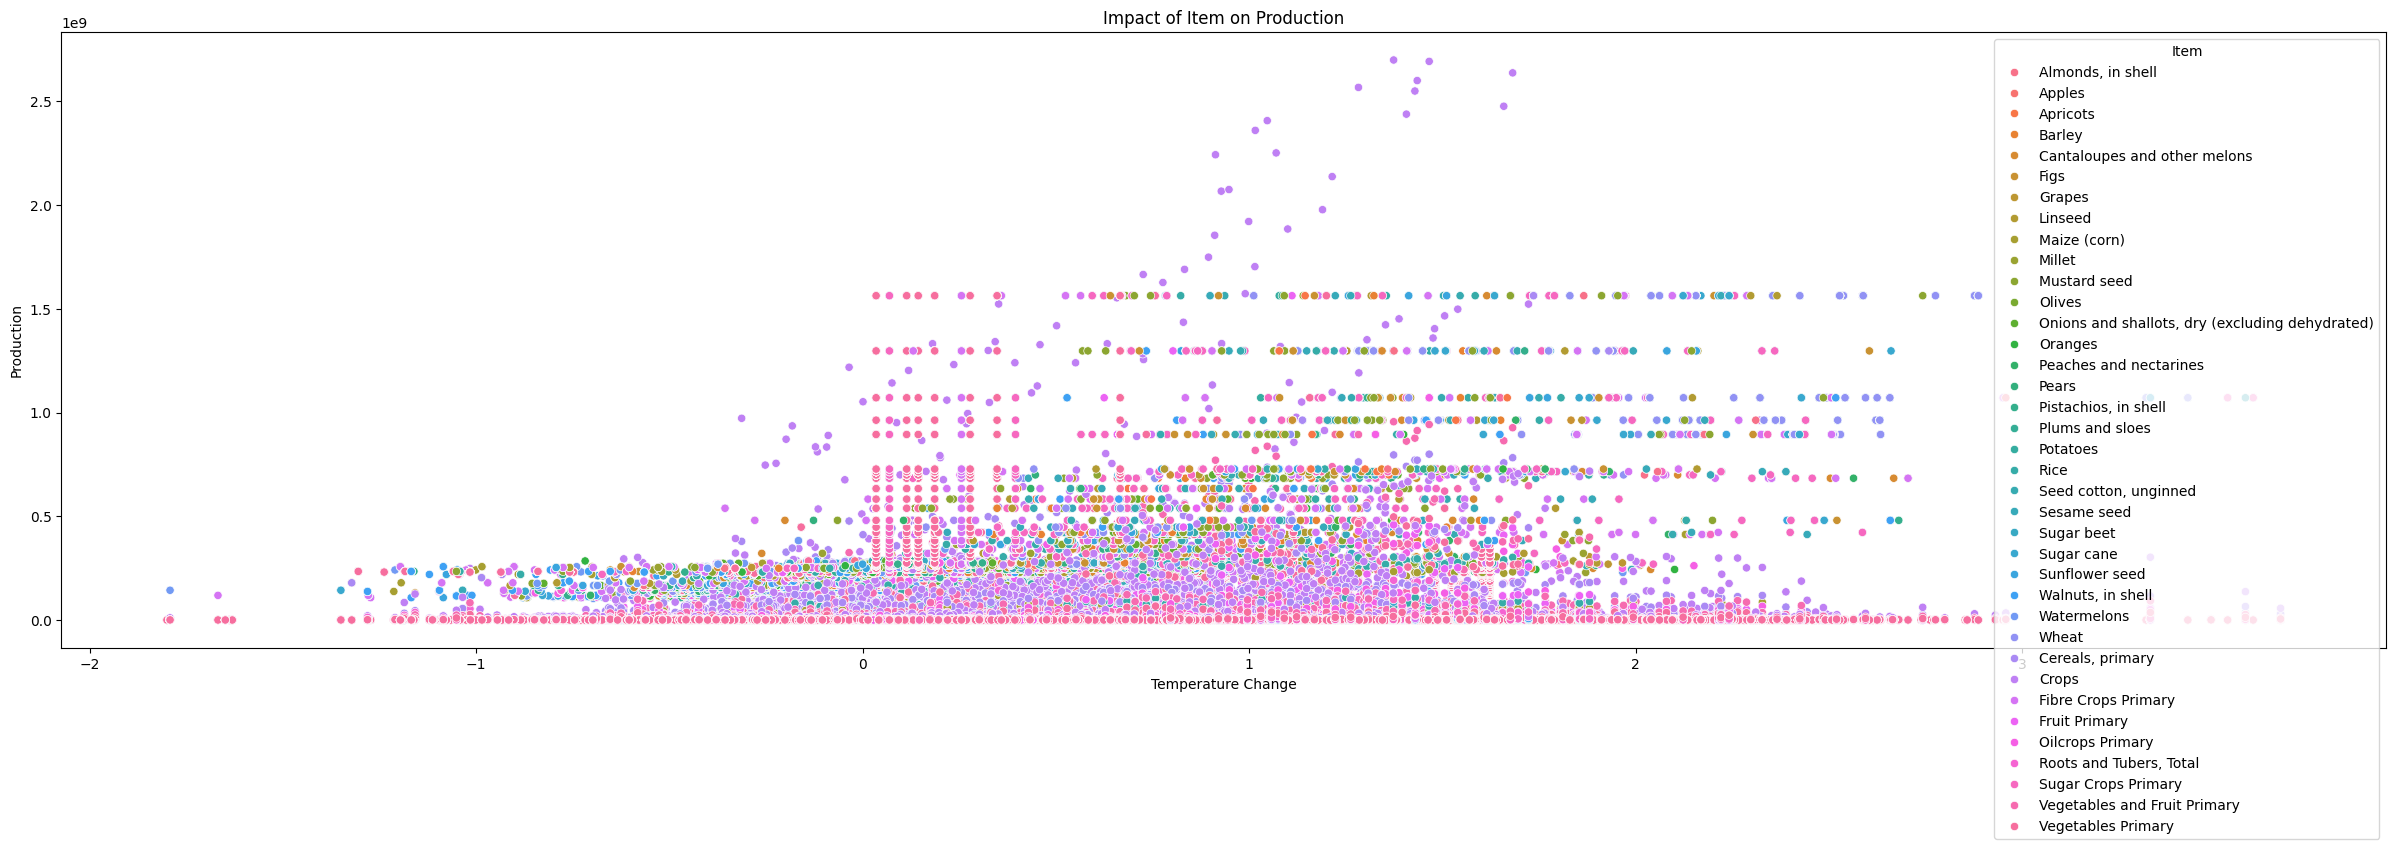

In [ ]:
plot_scatter(product_temp, 'Temperature Change', 'Production', 'Item',30)

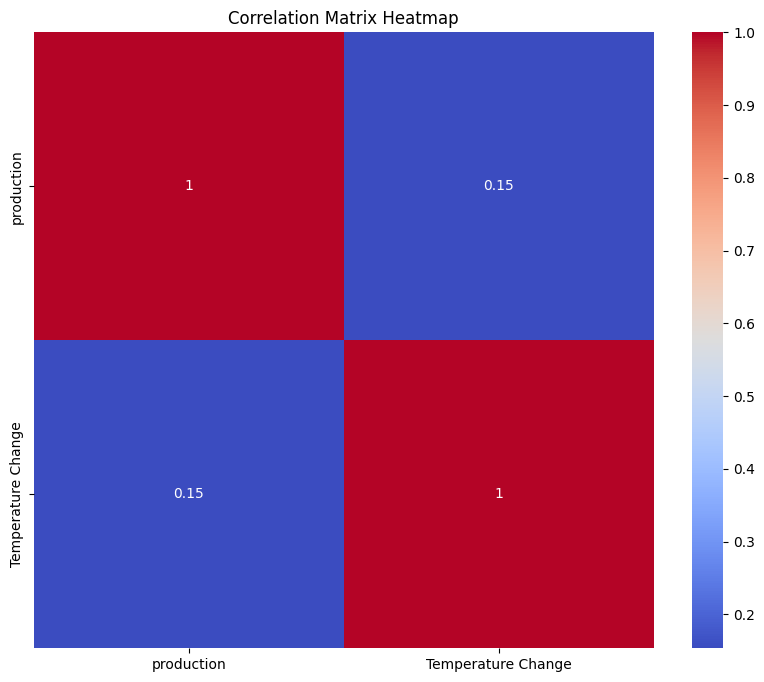

In [ ]:
numeric_columns = product_temp.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

 while there is a slight tendency for production to increase with temperature change, the relationship is not very strong, indicating that other factors likely play a significant role in determining production values.







---



C:\Users\Ayman\miniconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


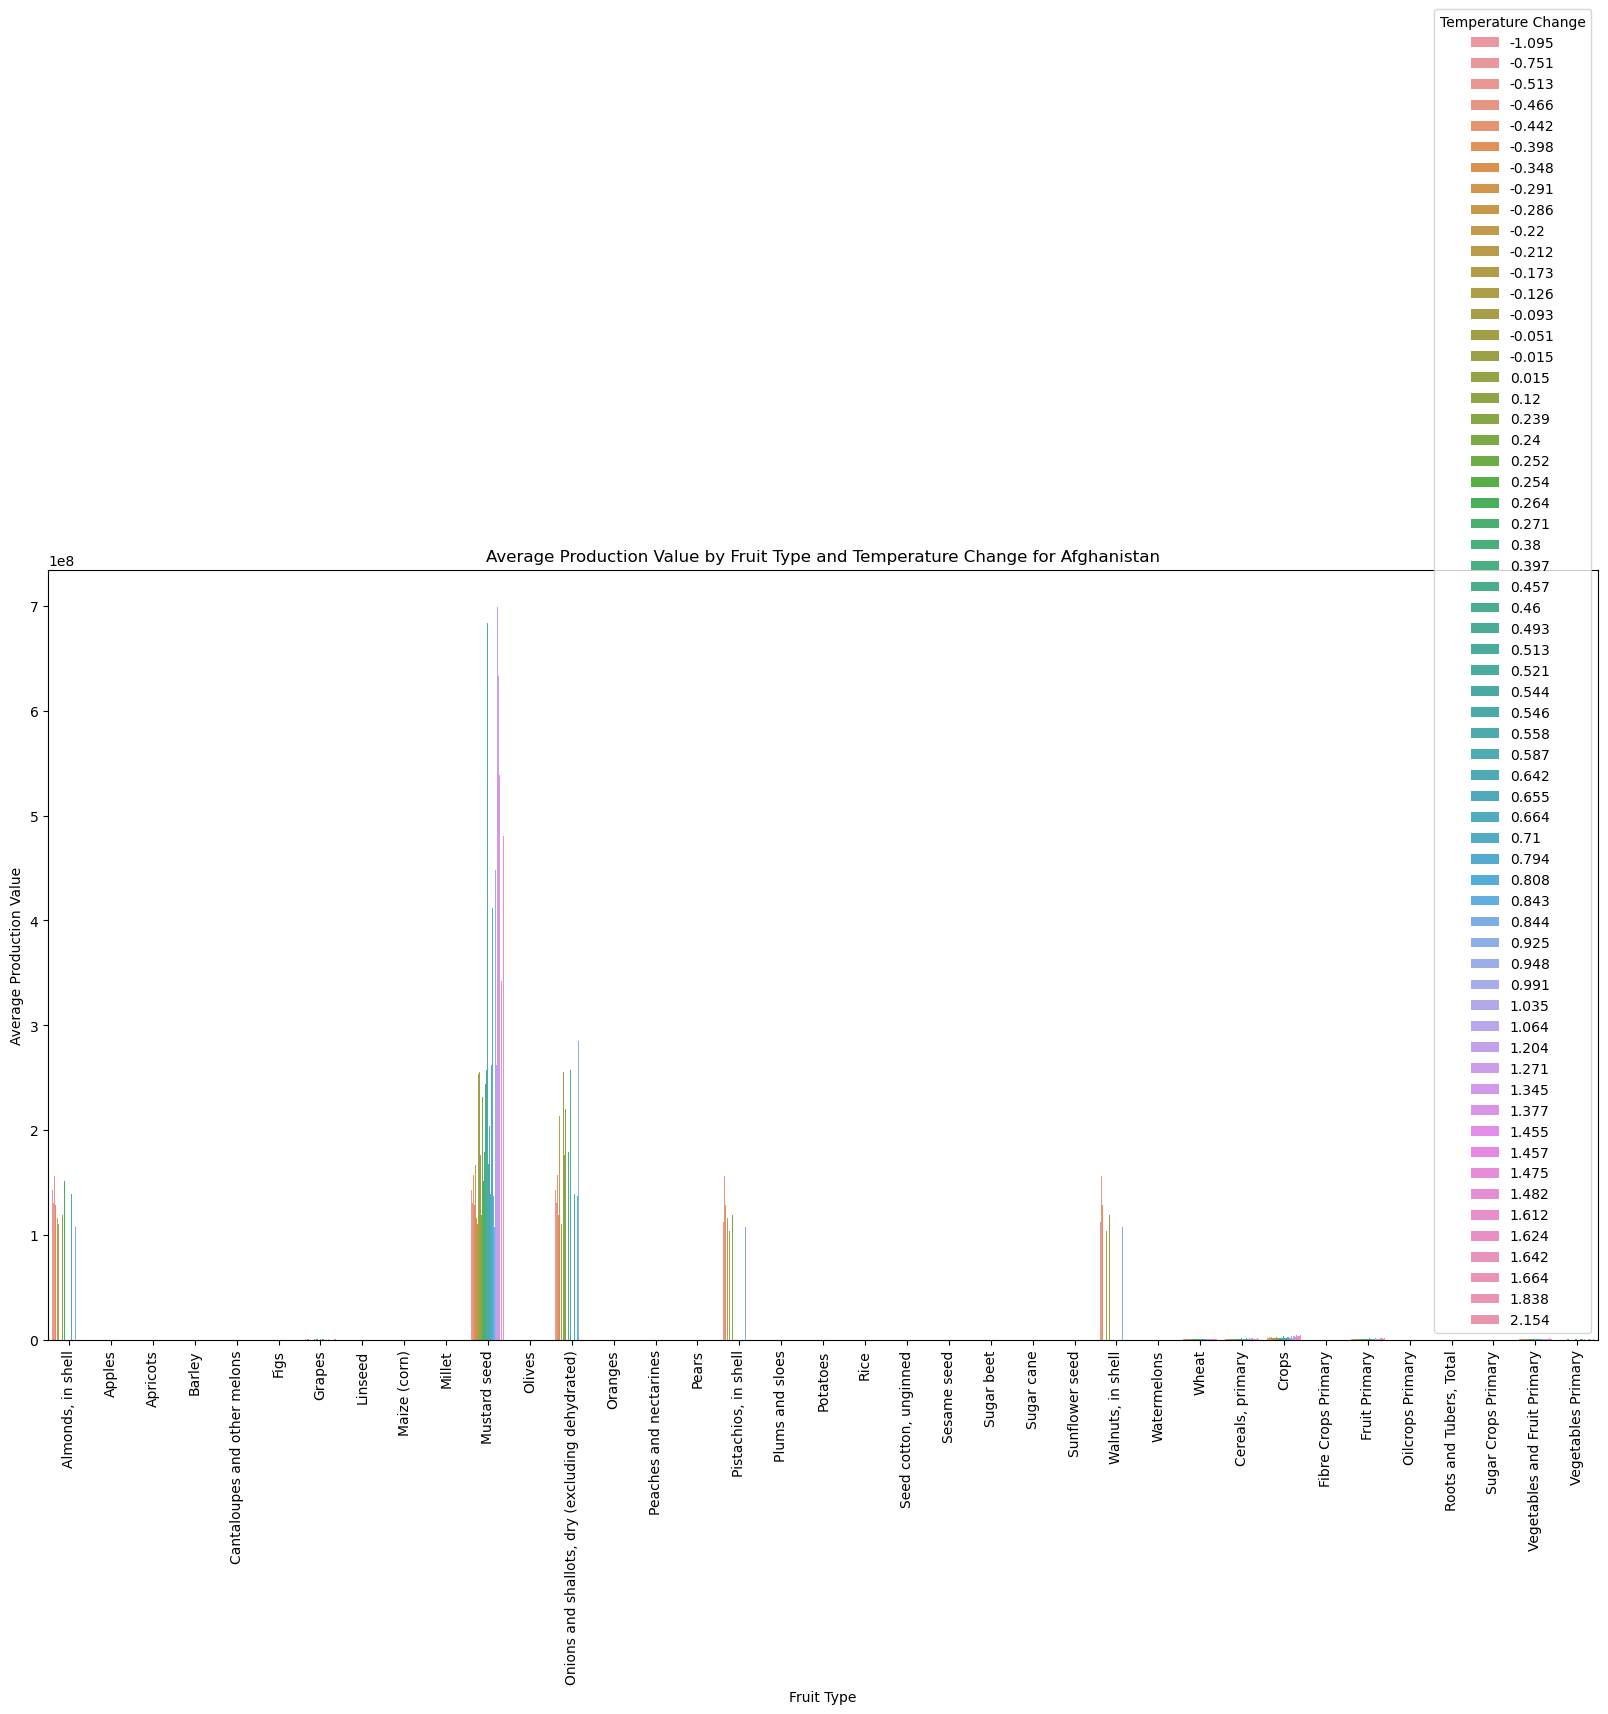

In [ ]:
country = 'Afghanistan'
country_data = product_temp[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='Production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [ ]:
correlation = country_data['Temperature Change'].corr(country_data['Production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['Production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Afghanistan: -0.034754917132666034
Average Production by Fruit Type in Afghanistan:
Item
Agriculture                                                                  4.230142e+06
Almonds, in shell                                                            3.125898e+07
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    6.324260e+07
Apples                                                                       2.600915e+04
Apricots                                                                     4.756663e+04
                                                                                 ...     
Vegetables Primary                                                           2.458857e+05
Vegetables and Fruit Primary                                                 1.097169e+06
Walnuts, in shell                                                            3.119325e+07
Watermelons                                 

**This analysis investigates the relationship between temperature change and agricultural production in Afghanistan. The correlation coefficient of -0.0348 indicates almost no linear relationship between the two variables. Additionally, the average production values for various fruit types were calculated, revealing that crops like almonds and juniper berries have the highest average production values. These insights help understand how different crops are affected by climate changes in Afghanistan**

lets try another country

In [ ]:
product_temp['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', '

Belarus


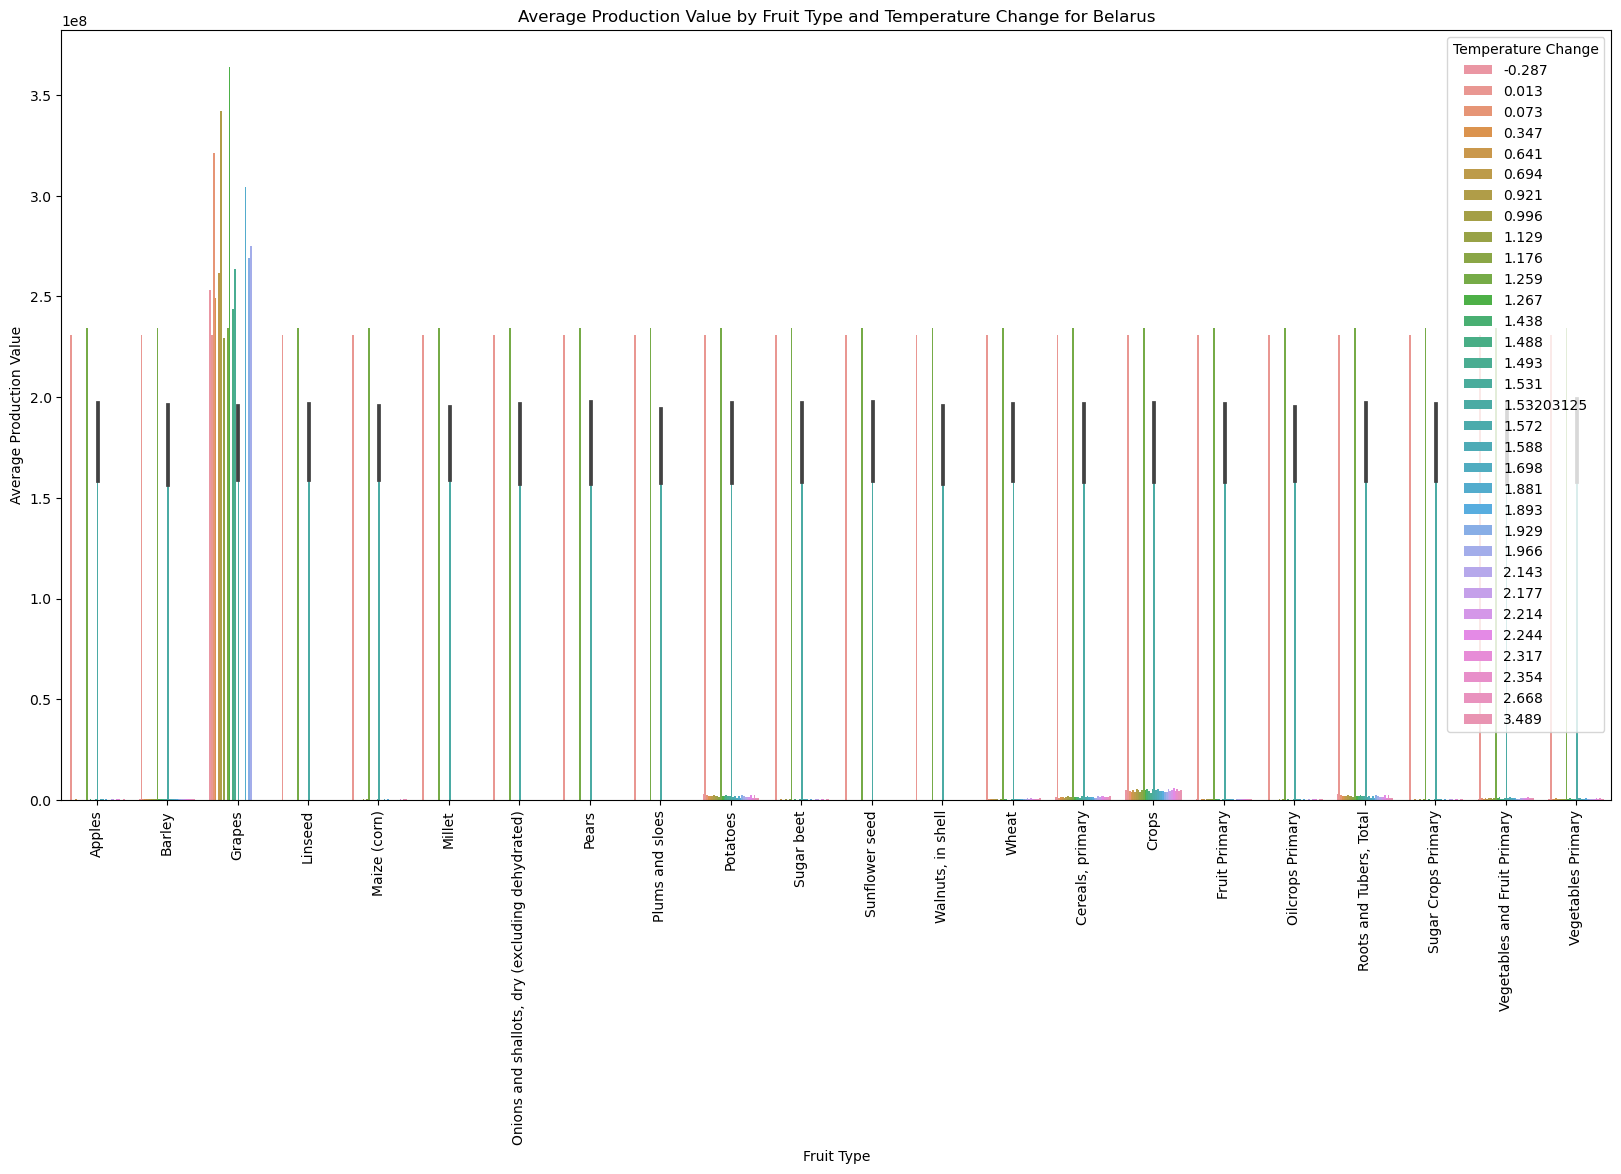

In [ ]:
country = np.random.choice(merged['Area'].unique())
print(country)
country_data = merged[merged['Area'] == country]

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x='Item', y='Production', hue='Temperature Change', data=country_data)
plt.title(f'Average Production Value by Fruit Type and Temperature Change for {country}')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=90)
plt.legend(title='Temperature Change')
plt.show()

In [ ]:

correlation = country_data['Temperature Change'].corr(country_data['Production'])
print(f"Correlation between Temperature Change and Production in {country}: {correlation}")

# Average production by fruit type for the specific country
average_production_by_fruit = country_data.groupby('Item')['Production'].mean()
print(f"Average Production by Fruit Type in {country}:")
print(average_production_by_fruit)

Correlation between Temperature Change and Production in Belarus: -0.10371809795108389
Average Production by Fruit Type in Belarus:
Item
Apples                                             9.597159e+07
Barley                                             9.605255e+07
Cereals, primary                                   9.656303e+07
Crops                                              9.805500e+07
Fruit Primary                                      9.604245e+07
Grapes                                             1.503769e+08
Linseed                                            9.589700e+07
Maize (corn)                                       9.593821e+07
Millet                                             9.589665e+07
Oilcrops Primary                                   9.597258e+07
Onions and shallots, dry (excluding dehydrated)    9.592362e+07
Pears                                              9.590395e+07
Plums and sloes                                    9.590233e+07
Potatoes                       

In [ ]:
land_cover.head()


,Area,Indicator,Year,Covered
0,Advanced Economies,Climate Altering Land Cover Index,1992,95.942016
1,Advanced Economies excluding US,Climate Altering Land Cover Index,1992,94.851414
2,Africa,Climate Altering Land Cover Index,1992,91.590697
3,Americas,Climate Altering Land Cover Index,1992,92.924554
4,Asia,Climate Altering Land Cover Index,1992,100.417597


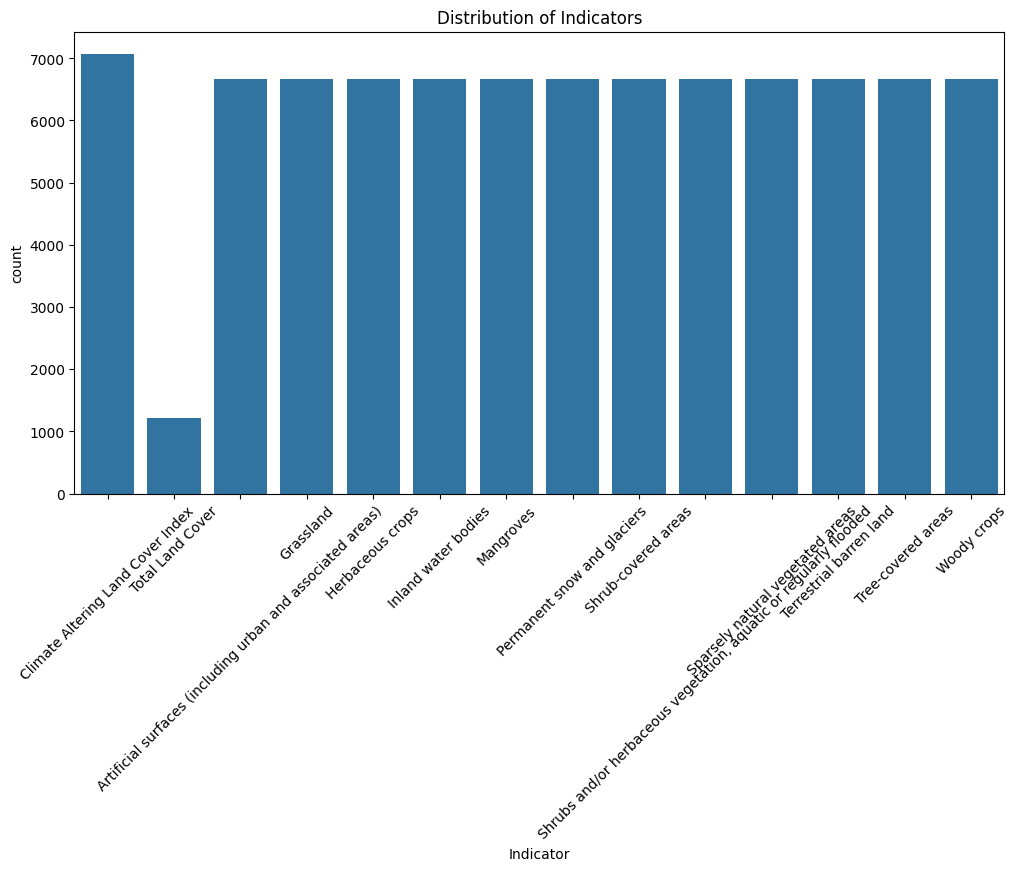

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Indicator', data=land_cover)
plt.xticks(rotation=45)
plt.title('Distribution of Indicators')
plt.show()


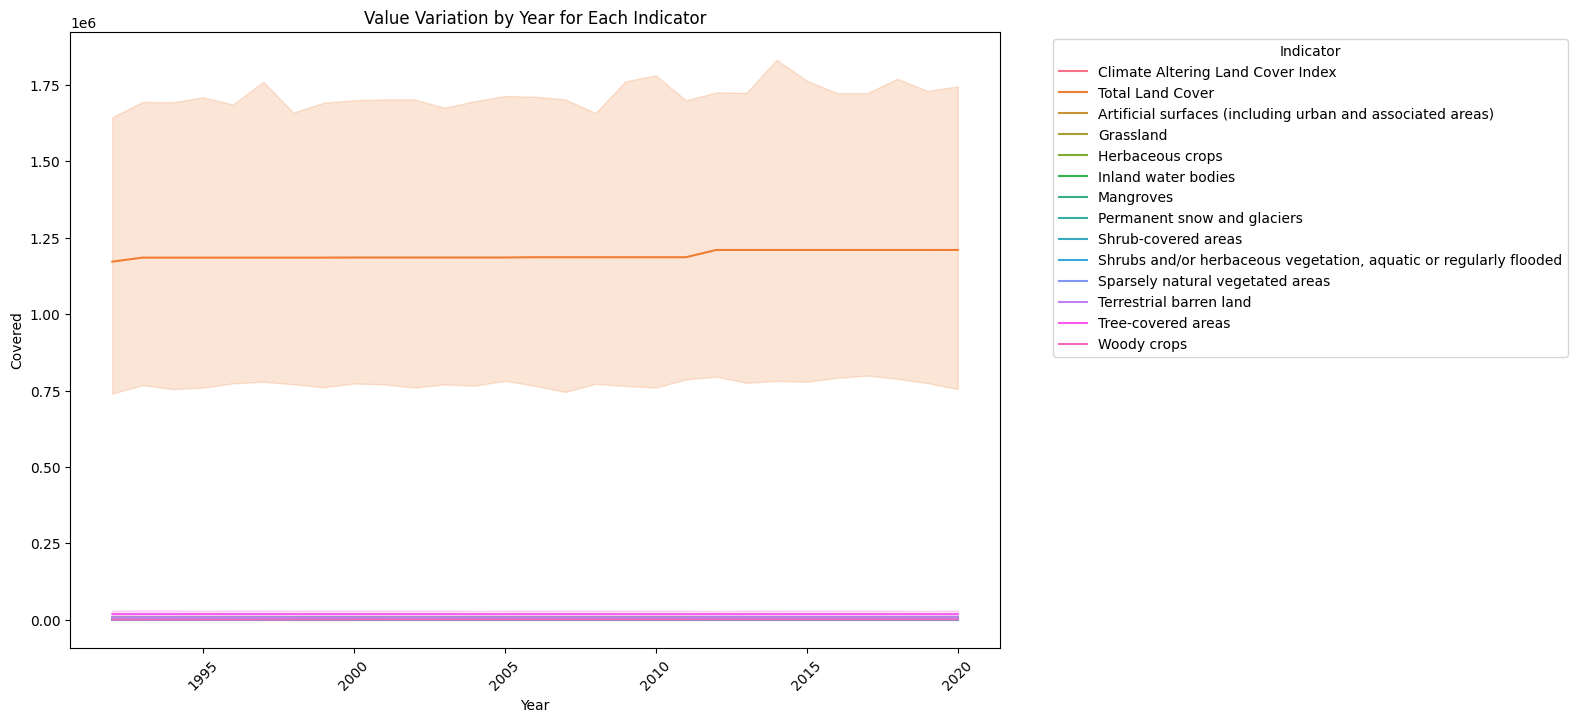

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Covered', hue='Indicator', data=land_cover)
plt.title('Value Variation by Year for Each Indicator')
plt.xlabel('Year')
plt.ylabel('Covered')
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:

product_land_cover = pd.merge(production,land_cover,on=['Area','Year'])

<Figure size 1000x600 with 0 Axes>

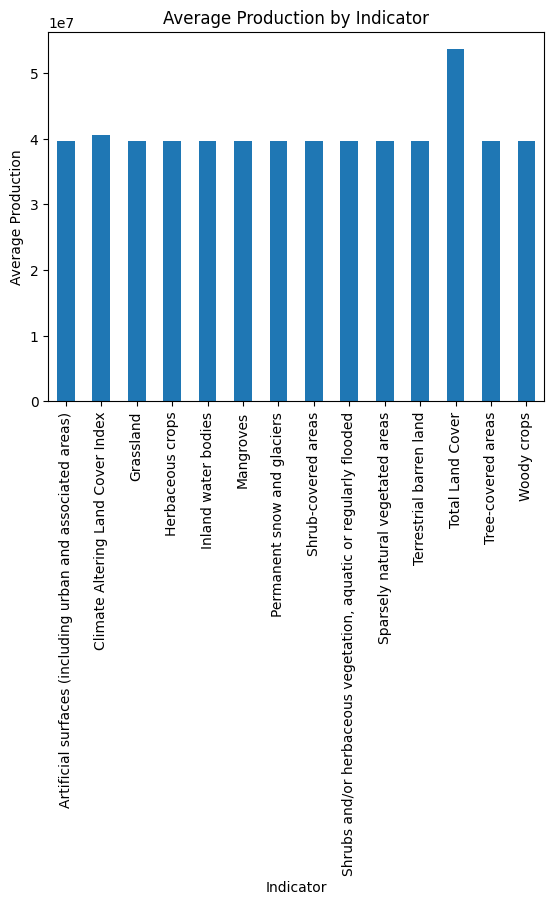

In [ ]:
plot_avg_production(product_land_cover, 'Indicator', 'Production')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


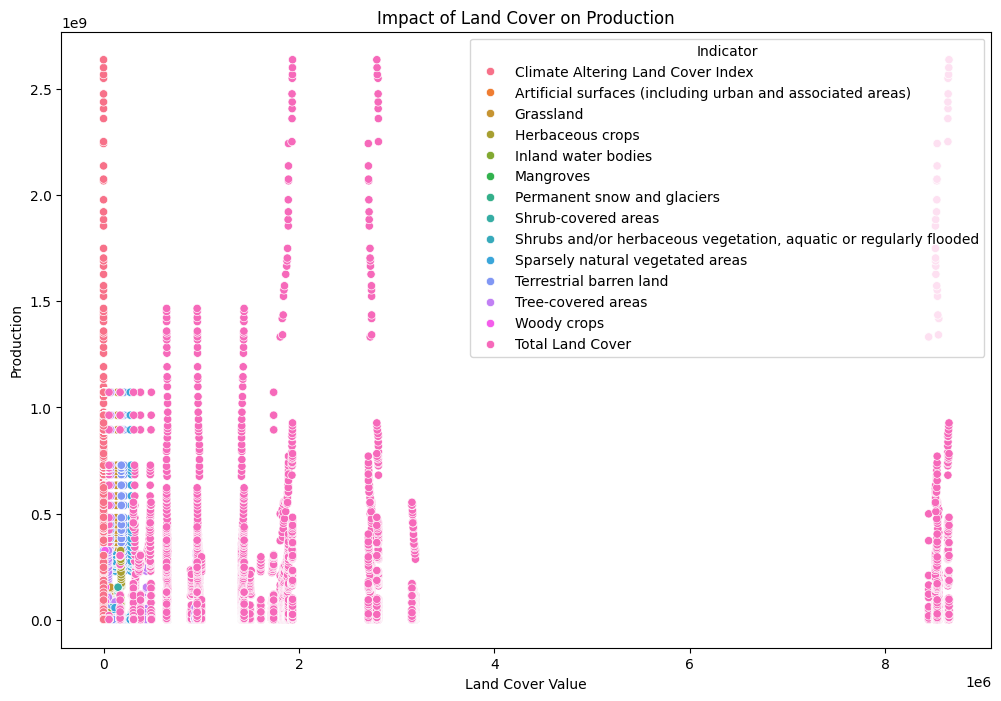

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Covered', y='Production', data=product_land_cover, hue='Indicator')
plt.title('Impact of Land Cover on Production')
plt.xlabel('Land Cover Value')
plt.ylabel('Production')
plt.legend(title='Indicator')
plt.show()


i want to remove "total land cover"" from the plot to see just the effect of differen types

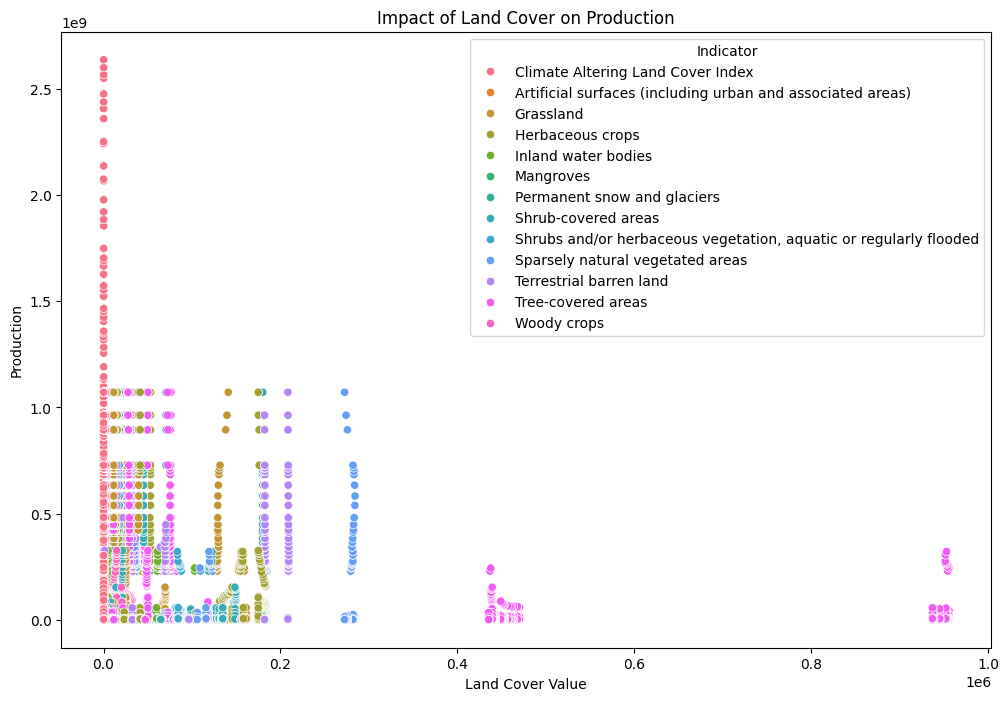

In [ ]:
product_land_cover  = product_land_cover[product_land_cover['Indicator'] != 'Total Land Cover']
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Covered', y='Production', data=product_land_cover, hue='Indicator')
plt.title('Impact of Land Cover on Production')
plt.xlabel('Land Cover Value')
plt.ylabel('Production')
plt.legend(title='Indicator')
plt.show()

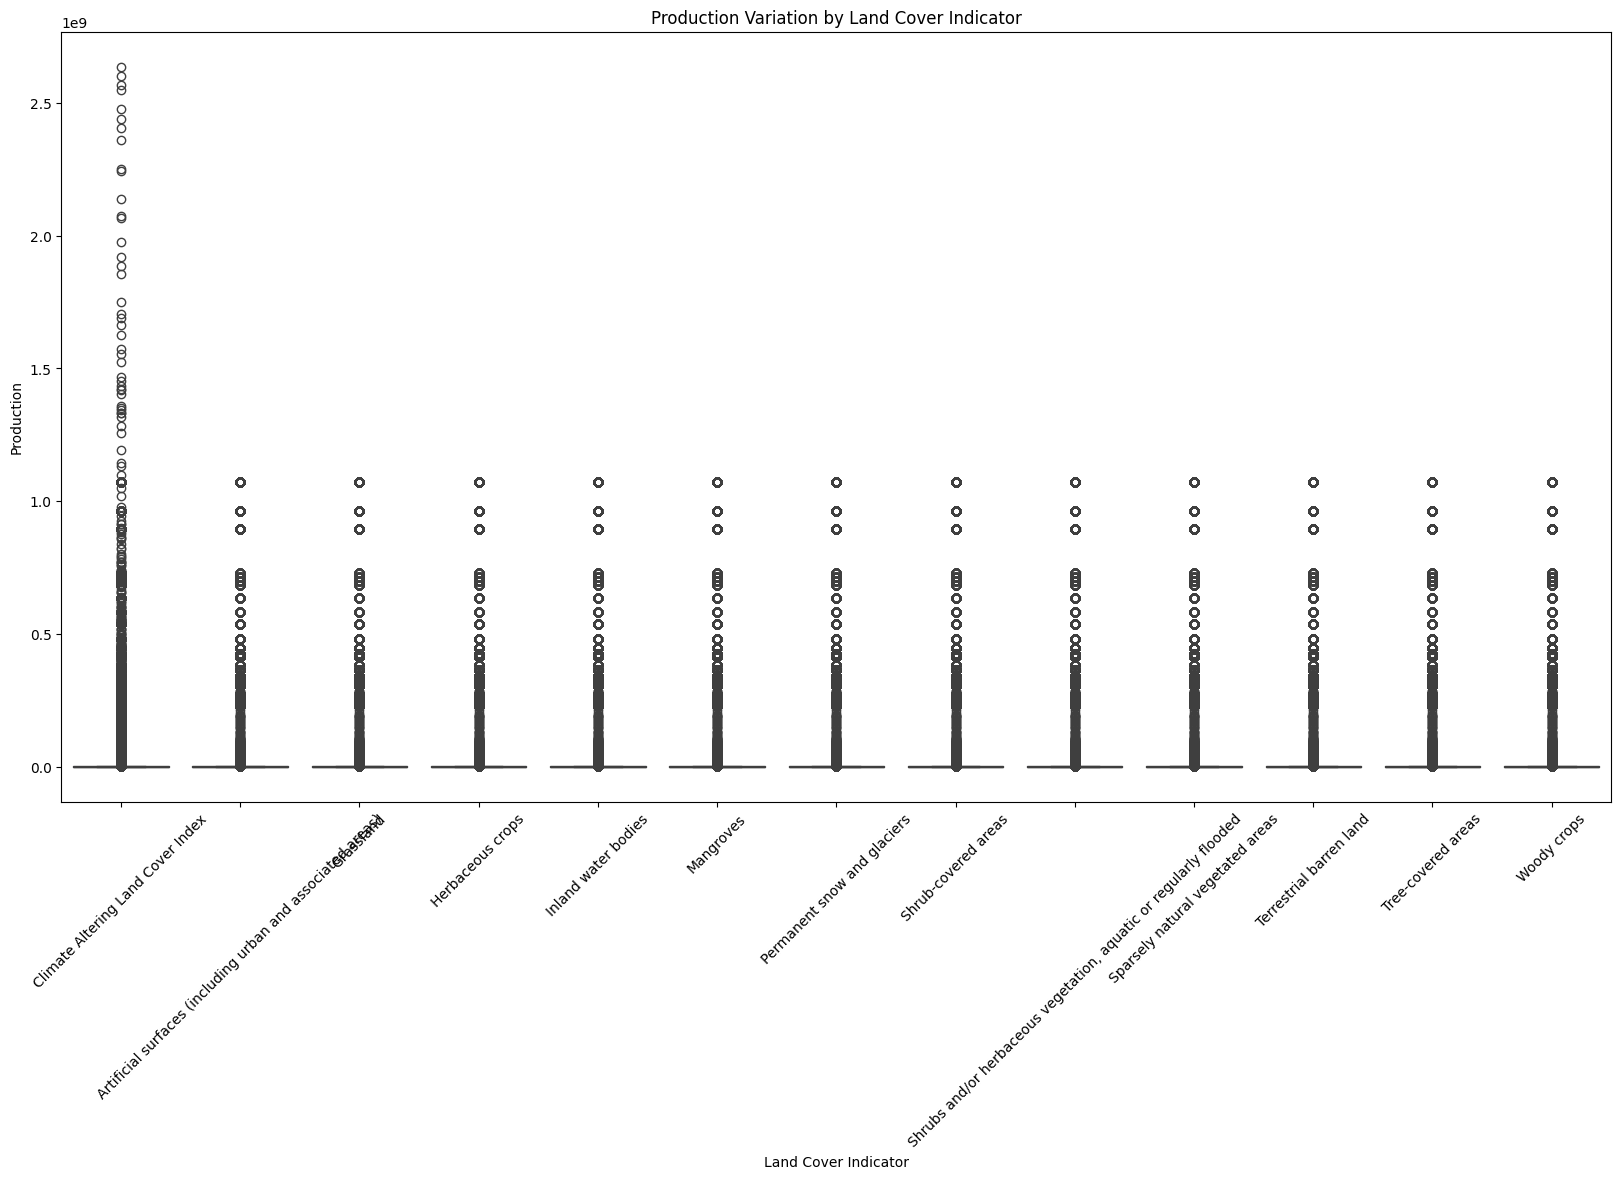

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(x='Indicator', y='Production', data=product_land_cover)
plt.title('Production Variation by Land Cover Indicator')
plt.xlabel('Land Cover Indicator')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1000x600 with 0 Axes>

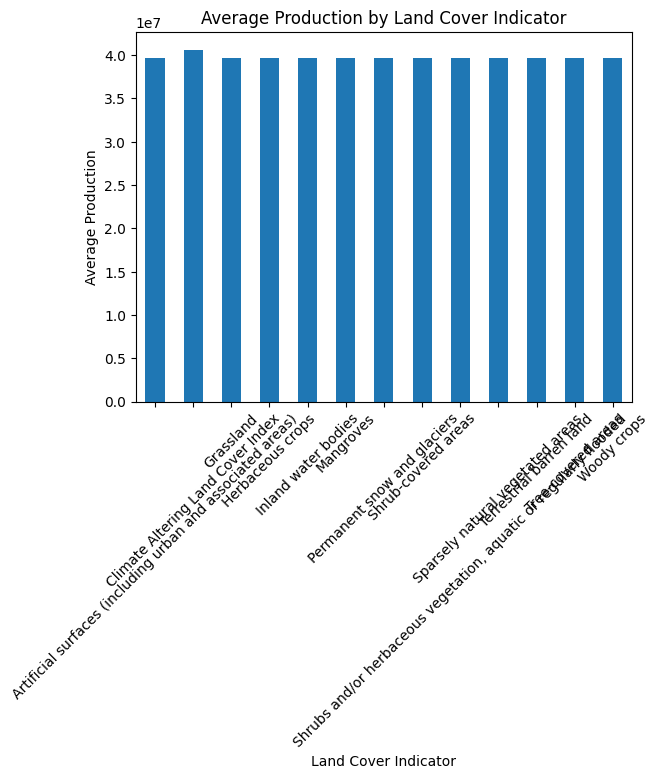

In [ ]:
# Pivot table to get correlations between indicators
pivot_df = product_land_cover.pivot_table(index='Indicator', values='Production', aggfunc='mean')

# Plotting correlations
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', legend=None)
plt.title('Average Production by Land Cover Indicator')
plt.xlabel('Land Cover Indicator')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
plt.show()


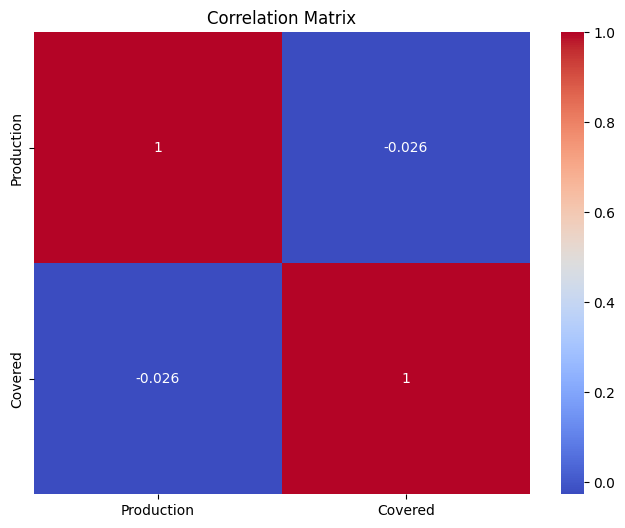

In [ ]:
# Calculate the correlation matrix
correlation_matrix = product_land_cover[['Production',  'Covered']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sea_level.head()

,Measure,Year,Level
0,Adriatic Sea,2008,27.953529
1,Adriatic Sea,2009,26.419189
2,Adriatic Sea,2010,64.689459
3,Adriatic Sea,2011,28.981351
4,Adriatic Sea,2012,19.959730


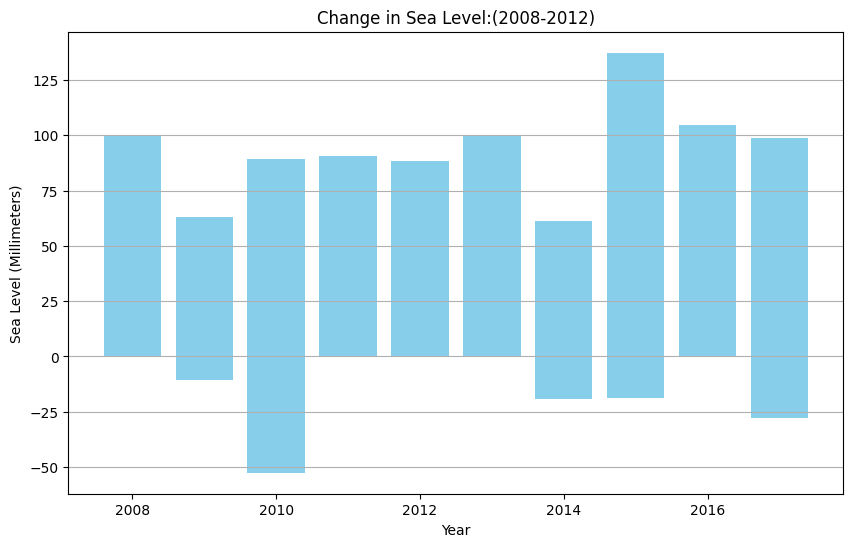

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sea_level['Year'], sea_level['Level'], color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (Millimeters)')
plt.title('Change in Sea Level:(2008-2012)')
plt.grid(axis='y')

# Show the plot
plt.show()

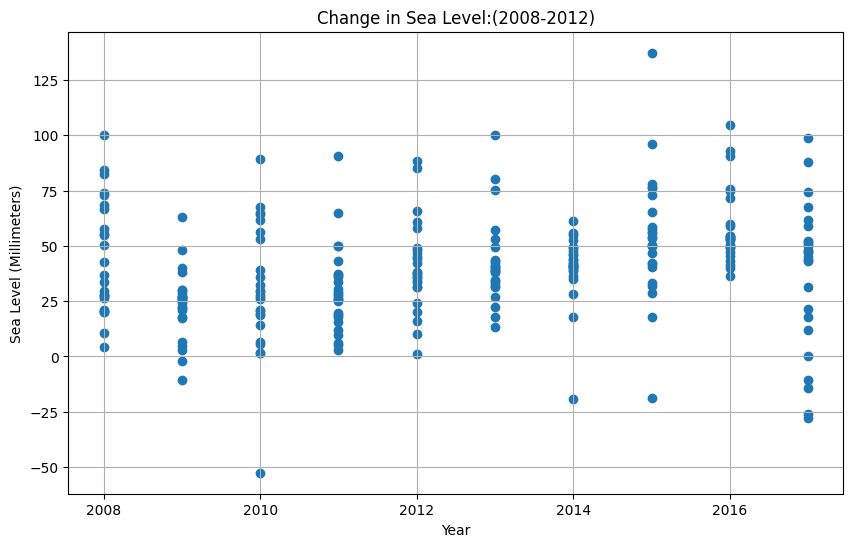

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(sea_level['Year'], sea_level['Level'], marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (Millimeters)')
plt.title('Change in Sea Level:(2008-2012)')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
production_sea_level = pd.merge(production, sea_level, on='Year', how='inner')

In [ ]:

production_sea_level.head()

,Area,Item,Year,Production,Measure,Level
0,Afghanistan,"Almonds, in shell",2008,212356.0,Adriatic Sea,27.953529
1,Afghanistan,"Almonds, in shell",2008,212356.0,Andaman Sea,84.379412
2,Afghanistan,"Almonds, in shell",2008,212356.0,Arabian Sea,4.197647
3,Afghanistan,"Almonds, in shell",2008,212356.0,Atlantic Ocean,27.143529
4,Afghanistan,"Almonds, in shell",2008,212356.0,Baltic Sea,100.314706


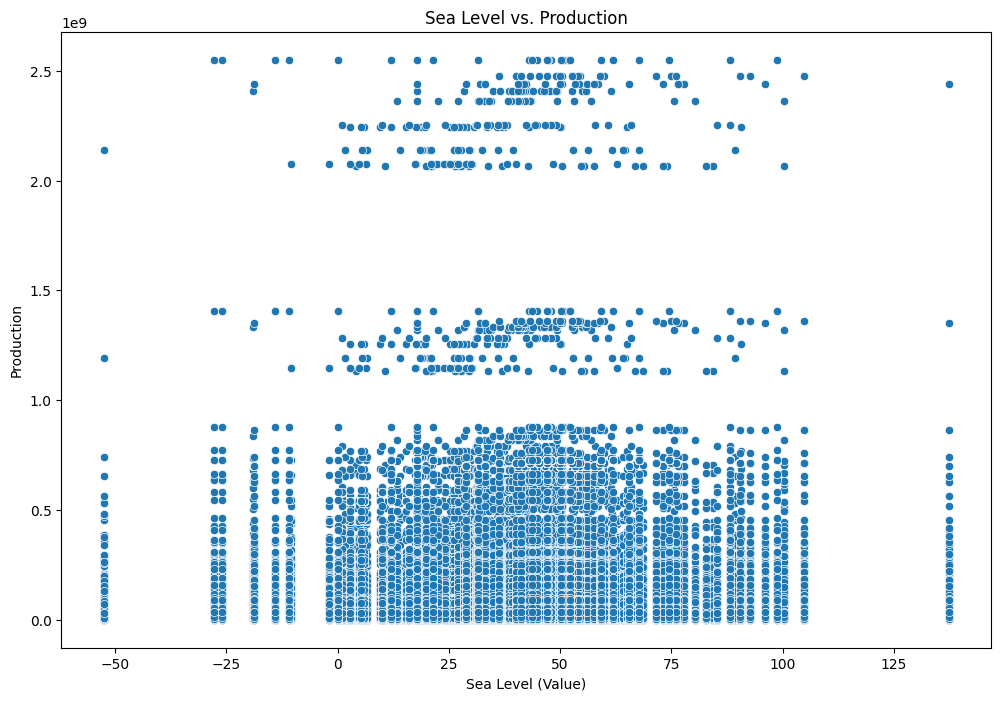

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Level', y='Production', data=production_sea_level)
plt.title('Sea Level vs. Production')
plt.xlabel('Sea Level (Value)')
plt.ylabel('Production')
plt.show()

In [ ]:
# Calculate the correlation between sea level (Value) and production
correlation = production_sea_level['Level'].corr(production_sea_level['Production'])
print(f"Correlation between Sea Level and Production: {correlation}")


Correlation between Sea Level and Production: 0.009599704398667456


In [ ]:
atmospheric.head()

,Year,CO2concentration
0,1959,0.236000
1,1960,0.293333
2,1961,0.232500
3,1962,0.255833
4,1963,0.168333


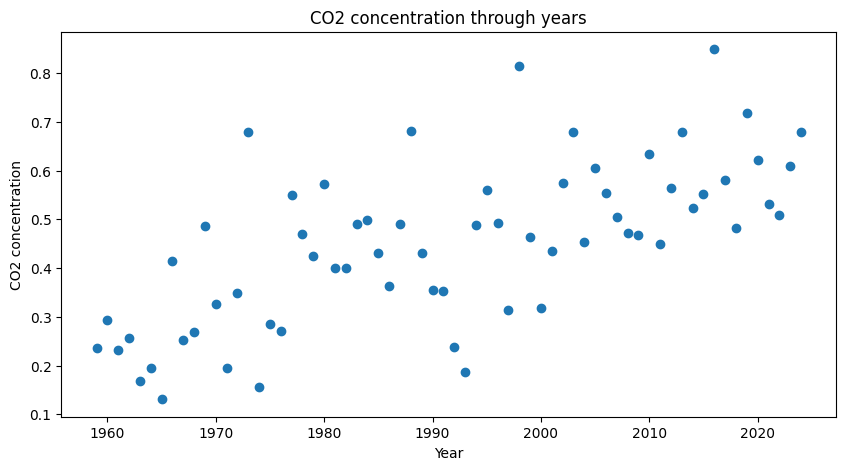

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(atmospheric['Year'],atmospheric['CO2concentration'])
plt.title('CO2 concentration through years')
plt.xlabel('Year')
plt.ylabel('CO2 concentration')
plt.show()

In [ ]:

production_CO2 = pd.merge(production, atmospheric, on = ['Year'])

In [ ]:
production_CO2.head()

,Area,Item,Year,Production,CO2concentration
0,Afghanistan,"Almonds, in shell",1961,1.042449e+08,0.2325
1,Afghanistan,Apples,1961,7.127000e+03,0.2325
2,Afghanistan,Apricots,1961,2.621000e+04,0.2325
3,Afghanistan,Barley,1961,7.364400e+04,0.2325
4,Afghanistan,Cantaloupes and other melons,1961,5.890000e+03,0.2325


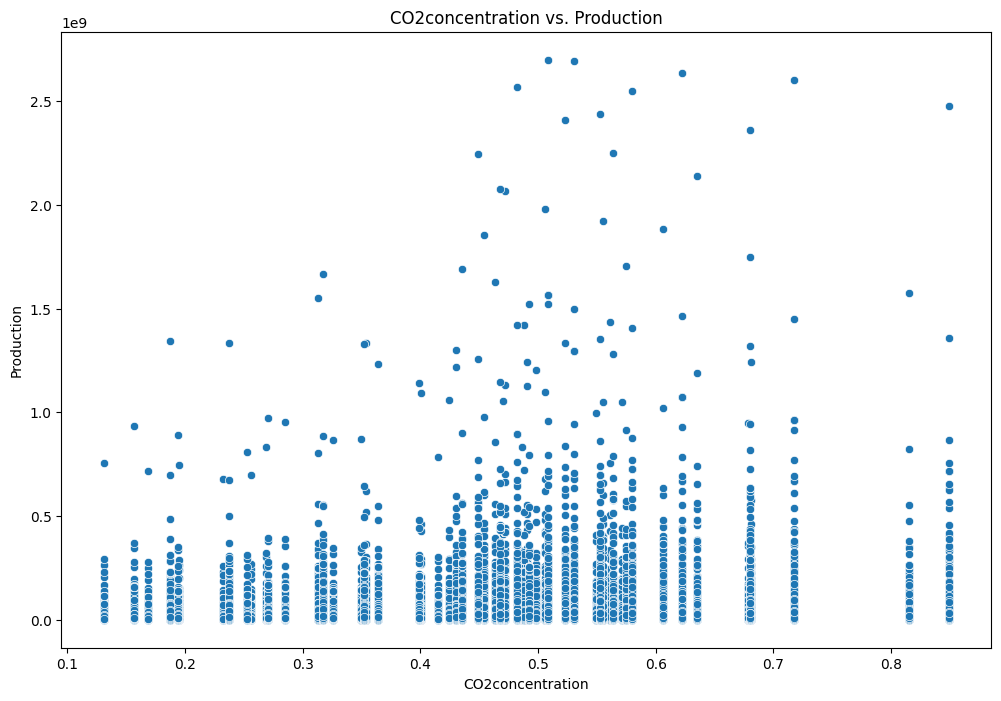

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CO2concentration', y='Production', data=production_CO2)
plt.title('CO2concentration vs. Production')
plt.xlabel('CO2concentration')
plt.ylabel('Production')
plt.show()

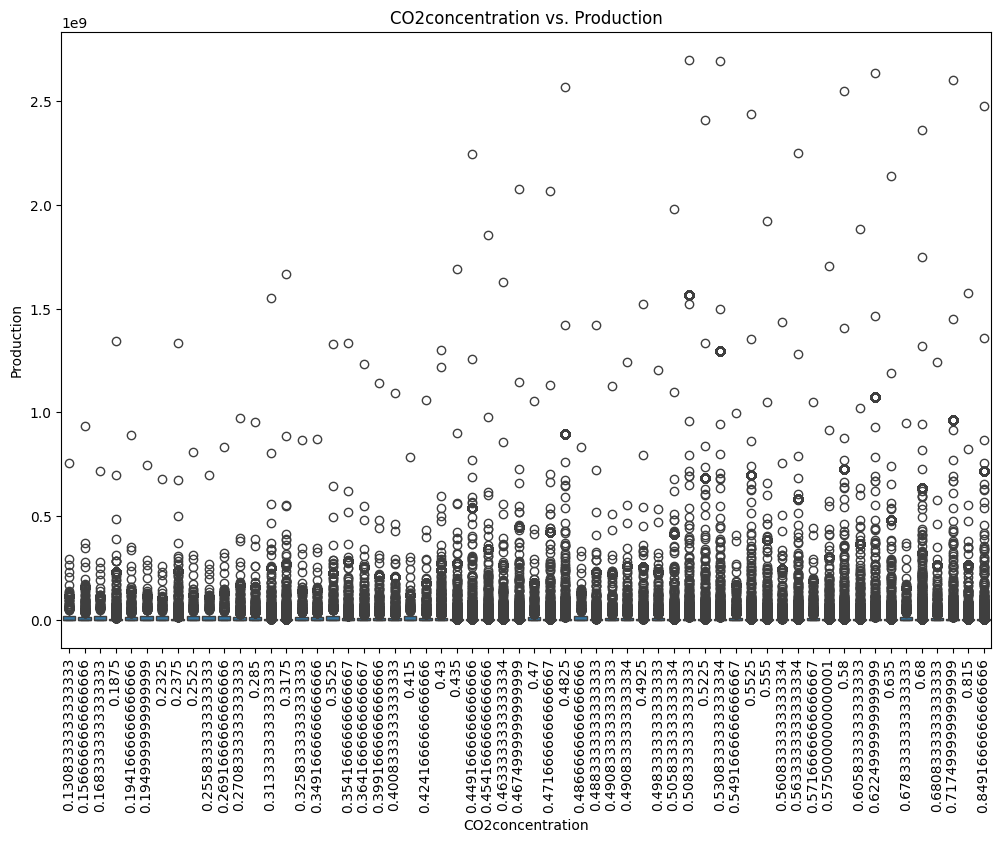

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CO2concentration', y='Production', data=production_CO2)
plt.title('CO2concentration vs. Production')
plt.xlabel('CO2concentration')
plt.xticks(rotation = 90)
plt.ylabel('Production')
plt.show()

In [ ]:
# Calculate correlations
correlation_CO2 = production_CO2['CO2concentration'].corr(production_CO2['Production'])
print(f"Correlation between CO2 Concentration and Production: {correlation_CO2}")

Correlation between CO2 Concentration and Production: 0.06779491972958726
